<a href="https://colab.research.google.com/github/MAHMUDURRAHMANARNOB/HIT140_assessment2/blob/main/Inferential_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load Cleaned Data and Check Assumptions

In [14]:
# Load cleaned data (replace paths with yours from GitHub)
df1 = pd.read_csv('clean_dataset1.csv')  # Individual bat landings
df2 = pd.read_csv('clean_dataset2.csv')  # 30-min aggregates

In [4]:
# Quick check: Handle any remaining missing (from wrangling lecture)
df1 = df1.dropna(subset=['bat_landing_to_food', 'habit', 'seconds_after_rat_arrival'])
df2 = df2.dropna(subset=['bat_landing_number', 'rat_minutes'])

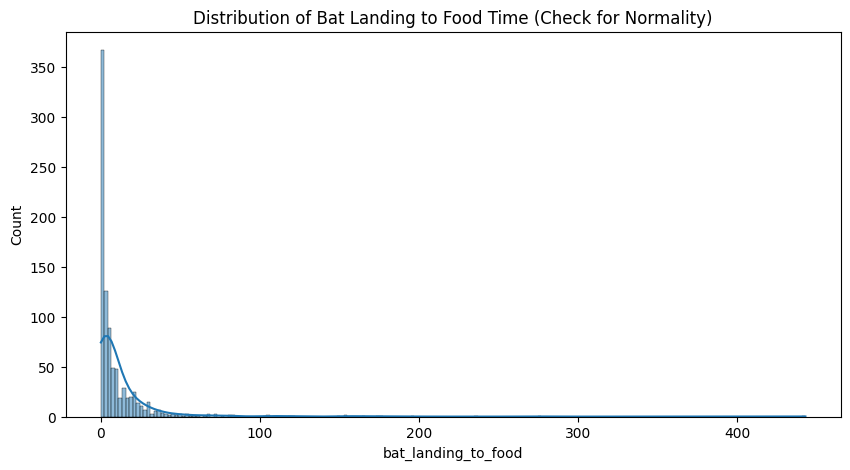

In [5]:
# Check normality (Lecture Part 1: Normal dist assumption for t-tests)
# Histogram for key vars
plt.figure(figsize=(10, 5))
sns.histplot(df1['bat_landing_to_food'], kde=True)
plt.title('Distribution of Bat Landing to Food Time (Check for Normality)')
plt.show()

In [ ]:
# Shapiro-Wilk test (p > 0.05 = normal)
shapiro_test = stats.shapiro(df1['bat_landing_to_food'])
print(f"Shapiro-Wilk for bat_landing_to_food: statistic={shapiro_test.statistic}, p={shapiro_test.pvalue}")

Shapiro-Wilk for bat_landing_to_food: statistic=0.38480396001204764, p=8.049915834949777e-48


**Test for Avoidance (Dataset2: Correlation)**

In [ ]:
# Pearson correlation (assumes normality; Lecture Part 1)
corr, p_value = stats.pearsonr(df2['bat_landing_number'], df2['rat_minutes'])
print(f"Correlation between bat landings and rat minutes: {corr:.3f} (p-value: {p_value:.3f})")


Correlation between bat landings and rat minutes: -0.146 (p-value: 0.000)


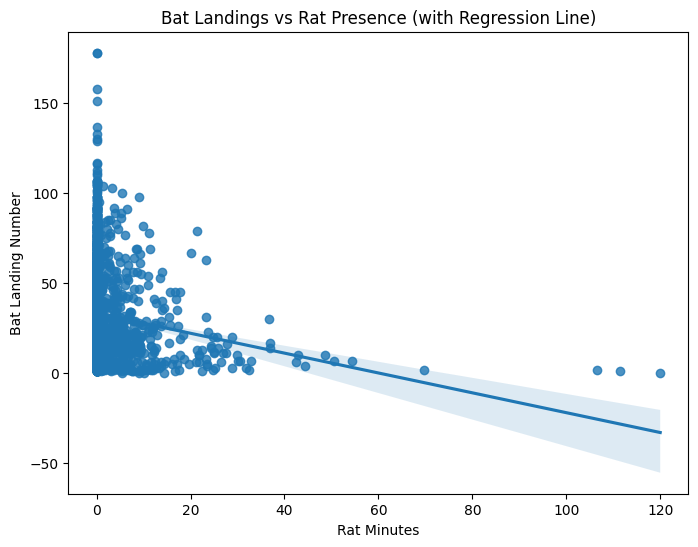

In [ ]:
# Visualize (build on your Step 3 scatterplot)
plt.figure(figsize=(8, 6))
sns.regplot(x='rat_minutes', y='bat_landing_number', data=df2)
plt.title('Bat Landings vs Rat Presence (with Regression Line)')
plt.xlabel('Rat Minutes')
plt.ylabel('Bat Landing Number')
plt.show()

**Test for Vigilance (Dataset1: T-Test on Groups)**

In [ ]:
# Feature engineering: Group habits (wrangling lecture)
rat_habits = ['rat', 'rat_and_no_food', 'rat_and_others', 'pick_rat']  # Add based on your data's unique habits
df1['rat_present'] = df1['habit'].apply(lambda x: 'Yes' if x in rat_habits else 'No')

In [ ]:
# Split groups
time_rat = df1[df1['rat_present'] == 'Yes']['bat_landing_to_food']
time_no_rat = df1[df1['rat_present'] == 'No']['bat_landing_to_food']

In [ ]:
# One-sided t-test (Lecture Part 2: Like cola example, test if mean > 0 effectively)
t_stat, p_value = stats.ttest_ind(time_rat, time_no_rat, alternative='greater')  # 'greater' for Hₐ: rat > no_rat
print(f"T-test for time to food (rat vs no-rat): t={t_stat:.3f}, p={p_value:.3f}")

T-test for time to food (rat vs no-rat): t=-1.335, p=0.909


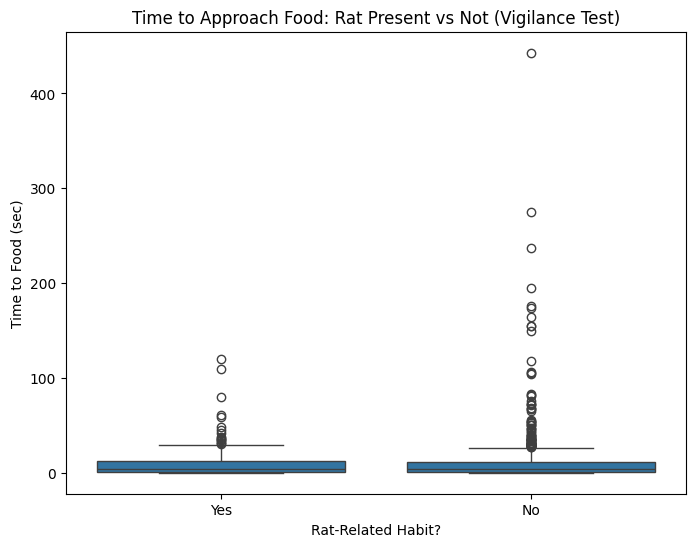

In [ ]:
# Boxplot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='rat_present', y='bat_landing_to_food', data=df1)
plt.title('Time to Approach Food: Rat Present vs Not (Vigilance Test)')
plt.xlabel('Rat-Related Habit?')
plt.ylabel('Time to Food (sec)')
plt.show()

**Normality check**

In [13]:
from scipy import stats
shapiro_result = stats.shapiro(df1['bat_landing_to_food'])
print(f"Shapiro-Wilk Test: statistic={shapiro_result.statistic}, p={shapiro_result.pvalue}")

Shapiro-Wilk Test: statistic=0.38480396001204764, p=8.049915834949777e-48


**One sample t-test**

In [6]:
# One-sample t-test for vigilance (Dataset1): H0: mean time = 0 (no delay), Ha: mean > 0 (delay due to rats as predators, like cola loss >0)
one_t, one_p = stats.ttest_1samp(df1['bat_landing_to_food'], popmean=0, alternative='greater')
print(f"One-sample t-test (mean time > 0): t={one_t:.3f}, p={one_p:.3f}")

One-sample t-test (mean time > 0): t=12.755, p=0.000


**Two Sample t-test**

In [7]:
# Two-sample t-test for vigilance (Dataset1): Group by rat-related habits
rat_habits = [h for h in df1['habit'].unique() if 'rat' in h.lower()]  # Feature engineering (wrangling lecture)
df1['rat_present'] = df1['habit'].isin(rat_habits)
time_rat = df1[df1['rat_present']]['bat_landing_to_food']
time_no_rat = df1[~df1['rat_present']]['bat_landing_to_food']
vig_t, vig_p = stats.ttest_ind(time_rat, time_no_rat, alternative='greater')  # Ha: time rat > no-rat
print(f"Two-sample t-test vigilance (rat > no-rat): t={vig_t:.3f}, p={vig_p:.3f}")

Two-sample t-test vigilance (rat > no-rat): t=1.238, p=0.108


In [8]:
# Two-sample t-test for avoidance (Dataset2): H0: no difference in landings rat vs no-rat, Ha: landings no-rat > rat (avoidance)
df2['rat_present'] = df2['rat_minutes'] > 0
land_rat = df2[df2['rat_present']]['bat_landing_number']
land_no_rat = df2[~df2['rat_present']]['bat_landing_number']
avoid_t, avoid_p = stats.ttest_ind(land_no_rat, land_rat, alternative='greater')
print(f"Two-sample t-test avoidance (no-rat > rat): t={avoid_t:.3f}, p={avoid_p:.3f}")

Two-sample t-test avoidance (no-rat > rat): t=4.687, p=0.000


In [9]:
# Correlation for avoidance (Dataset2): H0: corr=0, Ha: corr <0
corr, corr_p = stats.pearsonr(df2['bat_landing_number'], df2['rat_minutes'])
print(f"Pearson correlation (landings vs rat_minutes): corr={corr:.3f}, p={corr_p:.3f}")

Pearson correlation (landings vs rat_minutes): corr=-0.146, p=0.000


In [12]:
# Results table
results = pd.DataFrame({
    'Test': ['One-sample t-test (vigilance)', 'Two-sample t-test (vigilance)', 'Two-sample t-test (avoidance)', 'Pearson correlation (avoidance)'],
    'Hypothesis': ['Ha: mean time >0', 'Ha: time rat > no-rat', 'Ha: landings no-rat > rat', 'Ha: corr <0'],
    'Statistic': [one_t, vig_t, avoid_t, corr],
    'P-Value': [one_p, vig_p, avoid_p, corr_p],
    'Conclusion': ['Reject H0 (evidence)' if p < 0.05 else 'Fail to reject H0 (no evidence)' for p in [one_p, vig_p, avoid_p, corr_p]]
})
print(results)

                              Test                 Hypothesis  Statistic  \
0    One-sample t-test (vigilance)           Ha: mean time >0  12.754953   
1    Two-sample t-test (vigilance)      Ha: time rat > no-rat   1.237508   
2    Two-sample t-test (avoidance)  Ha: landings no-rat > rat   4.686916   
3  Pearson correlation (avoidance)                Ha: corr <0  -0.146228   

        P-Value                       Conclusion  
0  1.098096e-34             Reject H0 (evidence)  
1  1.081100e-01  Fail to reject H0 (no evidence)  
2  1.474805e-06             Reject H0 (evidence)  
3  1.287525e-11             Reject H0 (evidence)  
